# Анализ данных о криптовалютах полученных с CryptoRank.io и bscscan.com

## Объединение данных полученных из разных источников

In [1]:
import json
import pandas as pd
import sys

# Функция для конвертации данных из JSON в DataFrame и сохранения в CSV файл
def to_df(filename):
    # Открываем JSON файл для чтения
    with open(filename, 'r', encoding='utf-8') as json_file:
        # Загружаем данные из JSON файла
        data = json.load(json_file)

    # Создаем DataFrame из данных
    df = pd.DataFrame(data)

    # Сохраняем DataFrame в CSV файл с тем же именем, что и у исходного JSON файла, но с расширением .csv
    df.to_csv(f'{filename.split(".json")[0]}.csv', index=False, sep=';')

    # Возвращаем DataFrame
    return df

# Вызываем функцию to_df для файла 'coin_data.json'
scan = to_df('coin_data.json')

# Открываем JSON файл 'contract_data.json' для чтения
with open("contract_data.json", 'r') as json_file:
    # Загружаем данные из JSON файла
    data = json.load(json_file)

In [2]:

dx_df = pd.read_csv('dx_codes.csv')
dx_df = dx_df[['name', 'code', 'is_web_live']]
dx_df['lifeCycle'] = dx_df['is_web_live'].apply(lambda x: int(x))
dx_df.drop(columns=['is_web_live'], inplace=True)
dx_df

,name,code,lifeCycle
0,ZeniCoin,pragma solidity ^0.6.12;\r\n\r\n// SPDX-Licens...,1
1,DexGen,/*\r\n// Official DxFee Token\r\n// To Mint yo...,1
2,BAMBI,// SPDX-License-Identifier: MIT\n\n\n\n\n\n\n\...,1
3,Pinky Swear,/**\r\n// SPDX-License-Identifier: MIT\r\n\r\n...,1
4,RawKit,/*\r\n// Official DxFee Token\r\n// To Mint yo...,1
...,...,...,...
131,MarkpsTokAmnt,// SPDX-License-Identifier: MIT\r\npragma soli...,1
132,MarkDec19PS,// SPDX-License-Identifier: MIT\r\npragma soli...,1
133,MarkDec09OF,// SPDX-License-Identifier: MIT\r\npragma soli...,1
134,MarkDec1OF,// SPDX-License-Identifier: MIT\r\npragma soli...,1


In [3]:
cryptorank_df = pd.read_csv('cryptorank_codes.csv')
cryptorank_df = cryptorank_df[~(cryptorank_df['lifeCycle'] == 'crowdsale')]
cryptorank_df['lifeCycle'] = cryptorank_df['lifeCycle'].apply(lambda x: 1 if x == 'traded' else 0)
cryptorank_df

,name,code,lifeCycle
0,EOS,pragma solidity 0.5.16;\r\n\r\ninterface IBEP2...,1
1,XRP,pragma solidity 0.5.16;\r\n\r\ninterface IBEP2...,1
2,Cardano,pragma solidity 0.5.16;\r\n\r\ninterface IBEP2...,1
3,Litecoin,/**\r\n *Submitted for verification at Bscscan...,1
4,Bitcoin Cash,pragma solidity 0.5.16;\r\n\r\ninterface IBEP2...,1
...,...,...,...
360,Fujinto,pragma solidity ^0.4.2;\r\ncontract owned {\r\...,0
361,Senderon,pragma solidity ^0.4.11;\r\n \r\ncontract Toke...,0
362,Dalecoin,contract Token {\r\n\r\n /// @return total ...,0
363,PoSToken,pragma solidity ^0.4.11;\r\n\r\n\r\n/**\r\n * ...,0


In [4]:
# Функция для извлечения информации о монете из словарей
def extract_coin_info(item):
    if item is not None and 'props' in item and 'pageProps' in item['props']:
        return item['props']['pageProps']
    else:
        return None

# Создание нового датафрейма на основе информации о монете
coin_df = pd.json_normalize(scan['items'].apply(extract_coin_info).dropna())
coin_df

,rank,key,name,hasFundingRounds,symbol,type,lifeCycle,unlimitedSupply,totalSupply,percentOfCircSupply,...,histPrices.3Y.BTC,histPrices.3Y.ETH,histPrices.3Y.percentUSD,icoData.kyc,icoData.accepting,icoData.whitelist,icoData.teamFromCountries,athPrice.dateUSD,icoData.rates,isSponsored
0,NaN,patex,Patex,False,PATEX,token,crowdsale,False,8.000000e+06,4.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1716.0,cyber-arena,Cyber Arena,False,CAT,token,traded,False,5.000000e+09,14.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1699.0,virtual-versions,Virtual Versions,False,VV,token,traded,False,1.000000e+09,11.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1595.0,kryptonite,Kryptonite,False,SEILOR,token,traded,False,1.000000e+09,19.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1120.0,spartadex,SpartaDEX,False,SPARTA,token,traded,False,1.000000e+08,18.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,NaN,nft-alley,NFT Alley,True,ALLEY,token,traded,False,1.000000e+07,86.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,NaN,algopainter,AlgoPainter,False,ALGOP,token,inactive,False,1.000000e+08,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,1365.0,mydefipet,MyDeFiPet,True,DPET,token,traded,False,1.000000e+08,50.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2718,1814.0,mist-nft,Mist,False,MIST,token,traded,False,1.000000e+09,5.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Определим число уникальных данных, продолжать работу будем с ними**

In [5]:
print(coin_df.columns.to_list())

['rank', 'key', 'name', 'hasFundingRounds', 'symbol', 'type', 'lifeCycle', 'unlimitedSupply', 'totalSupply', 'percentOfCircSupply', 'tokens', 'category', 'categoryId', 'tagIds', 'fundIds', 'isTraded', 'marketDataNotAvailable', 'vesting', 'hasVesting', 'listingDate', 'icoFullyDilutedMarketCap', 'noData', 'icoStatus', 'initialSupply', 'initialMarketCap', 'existsOnTv', 'priorityTradingViewExchange', 'tabs', 'links', 'crowdsales', 'description', 'shortDescription', 'notification', 'mineable', 'tickersCount', 'exchangesCount', 'newsCount', 'watchlistsCount', 'hasTickers', 'fullName', 'priceUsd', 'image.native', 'image.icon', 'image.x60', 'image.x150', 'athPrice.BTC', 'athPrice.ETH', 'athPrice.USD', 'athPrice.date', 'athPrice.dateBTC', 'athPrice.dateETH', 'athPrice.marketCap', 'icoData.raised.BTC', 'icoData.raised.ETH', 'icoData.raised.USD', 'icoData.hardCap.BTC', 'icoData.hardCap.ETH', 'icoData.hardCap.USD', 'icoData.softCap.BTC', 'icoData.softCap.ETH', 'icoData.softCap.USD', 'icoData.descr

In [6]:
unique_keys_count = coin_df['key'].nunique()
print("Number of unique values in the 'key' column:", unique_keys_count)

Number of unique values in the 'key' column: 1424


In [7]:
threshold = 0.1 * len(coin_df)
df_cleaned = coin_df.dropna(axis=1, thresh=threshold)
yes_columns = ['name', 'hasFundingRounds', 'links', 'volume24hUsd', 'totalSupply', 'percentOfCircSupply', 'historyStartDay', 'lifeCycle']
df_cleaned = df_cleaned[yes_columns]
df_cleaned

,name,hasFundingRounds,links,volume24hUsd,totalSupply,percentOfCircSupply,historyStartDay,lifeCycle
0,Patex,False,"[{'type': 'web', 'value': 'https://patex.io/'}...",NaN,8.000000e+06,4.21,NaN,crowdsale
1,Cyber Arena,False,"[{'type': 'web', 'value': 'https://www.cyber-a...",29920.120165,5.000000e+09,14.95,2023-10-05,traded
2,Virtual Versions,False,"[{'type': 'web', 'value': 'https://virtualvers...",663475.492992,1.000000e+09,11.29,2023-09-12,traded
3,Kryptonite,False,"[{'type': 'discord', 'value': 'https://discord...",36897.969515,1.000000e+09,19.30,2023-08-14,traded
4,SpartaDEX,False,"[{'type': 'web', 'value': 'https://spartadex.i...",34726.685377,1.000000e+08,18.70,2023-08-08,traded
...,...,...,...,...,...,...,...,...
2715,NFT Alley,True,"[{'type': 'web', 'value': 'https://nftalley.io...",11.203164,1.000000e+07,86.99,2021-05-20,traded
2716,AlgoPainter,False,"[{'type': 'web', 'value': 'https://www.algopai...",NaN,1.000000e+08,10.00,2021-05-20,inactive
2717,MyDeFiPet,True,"[{'type': 'whitepaper', 'value': 'https://www....",68614.753369,1.000000e+08,50.23,2021-05-14,traded
2718,Mist,False,"[{'type': 'web', 'value': 'https://mist.game/'...",71808.588700,1.000000e+09,5.64,2021-04-17,traded


Снизу все данные которые мы можем использовать

In [8]:
print(list(coin_df.columns))

['rank', 'key', 'name', 'hasFundingRounds', 'symbol', 'type', 'lifeCycle', 'unlimitedSupply', 'totalSupply', 'percentOfCircSupply', 'tokens', 'category', 'categoryId', 'tagIds', 'fundIds', 'isTraded', 'marketDataNotAvailable', 'vesting', 'hasVesting', 'listingDate', 'icoFullyDilutedMarketCap', 'noData', 'icoStatus', 'initialSupply', 'initialMarketCap', 'existsOnTv', 'priorityTradingViewExchange', 'tabs', 'links', 'crowdsales', 'description', 'shortDescription', 'notification', 'mineable', 'tickersCount', 'exchangesCount', 'newsCount', 'watchlistsCount', 'hasTickers', 'fullName', 'priceUsd', 'image.native', 'image.icon', 'image.x60', 'image.x150', 'athPrice.BTC', 'athPrice.ETH', 'athPrice.USD', 'athPrice.date', 'athPrice.dateBTC', 'athPrice.dateETH', 'athPrice.marketCap', 'icoData.raised.BTC', 'icoData.raised.ETH', 'icoData.raised.USD', 'icoData.hardCap.BTC', 'icoData.hardCap.ETH', 'icoData.hardCap.USD', 'icoData.softCap.BTC', 'icoData.softCap.ETH', 'icoData.softCap.USD', 'icoData.descr

Добавим ещё столбец - код криптовалюты, для этого получим данные из json, создадим dataFrame и смерджим его с нашим по именам

In [9]:
n_data = list()
n_data = []
for key in data:
    if data[key] == []:
        continue
    n_data.append({'name' : key, 'code' : data[key]['result'][0]})

In [10]:
codes = pd.DataFrame(n_data)

In [11]:
codes

,name,code
0,Patex,{'SourceCode': '// OpenZeppelin Contracts v4.4...
1,Cyber Arena,{'SourceCode': '// File: @openzeppelin/contrac...
2,Virtual Versions,"{'SourceCode': '{{ ""language"": ""Solidity"", ..."
3,Kryptonite,"{'SourceCode': '{{ ""language"": ""Solidity"", ..."
4,SpartaDEX,"{'SourceCode': '{{ ""language"": ""Solidity"", ..."
...,...,...
1166,Polylastic,"{'SourceCode': '{{ ""language"": ""Solidity"", ..."
1167,NFT Alley,{'SourceCode': '// File: openzeppelin-solidity...
1168,AlgoPainter,{'SourceCode': '// File: @openzeppelin/contrac...
1169,Mist,"{'SourceCode': '{{ ""language"": ""Solidity"", ..."


In [12]:
result_df = pd.merge(codes, df_cleaned.drop_duplicates('name'), on='name', how='left')
result_df

,name,code,hasFundingRounds,links,volume24hUsd,totalSupply,percentOfCircSupply,historyStartDay,lifeCycle
0,Patex,{'SourceCode': '// OpenZeppelin Contracts v4.4...,False,"[{'type': 'web', 'value': 'https://patex.io/'}...",NaN,8.000000e+06,4.21,NaN,crowdsale
1,Cyber Arena,{'SourceCode': '// File: @openzeppelin/contrac...,False,"[{'type': 'web', 'value': 'https://www.cyber-a...",29920.120165,5.000000e+09,14.95,2023-10-05,traded
2,Virtual Versions,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",False,"[{'type': 'web', 'value': 'https://virtualvers...",663475.492992,1.000000e+09,11.29,2023-09-12,traded
3,Kryptonite,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",False,"[{'type': 'discord', 'value': 'https://discord...",36897.969515,1.000000e+09,19.30,2023-08-14,traded
4,SpartaDEX,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",False,"[{'type': 'web', 'value': 'https://spartadex.i...",34726.685377,1.000000e+08,18.70,2023-08-08,traded
...,...,...,...,...,...,...,...,...,...
1166,Polylastic,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",True,"[{'type': 'web', 'value': 'https://polylastic....",293938.399090,9.825410e+10,72.91,2021-05-10,traded
1167,NFT Alley,{'SourceCode': '// File: openzeppelin-solidity...,True,"[{'type': 'web', 'value': 'https://nftalley.io...",11.203164,1.000000e+07,86.99,2021-05-20,traded
1168,AlgoPainter,{'SourceCode': '// File: @openzeppelin/contrac...,False,"[{'type': 'web', 'value': 'https://www.algopai...",NaN,1.000000e+08,10.00,2021-05-20,inactive
1169,Mist,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",False,"[{'type': 'web', 'value': 'https://mist.game/'...",71808.588700,1.000000e+09,5.64,2021-04-17,traded


Наша цель - научиться предсказывать LifeCycle по коду криптовалют, для этого выкинем все ненужные признаки
volume24hUsd totalSupply percentOfCircSupply is_web_live pragma_version years_from_start

In [13]:
result_df = result_df[['name', 'code', 'lifeCycle']]

In [14]:
result_df.head()

,name,code,lifeCycle
0,Patex,{'SourceCode': '// OpenZeppelin Contracts v4.4...,crowdsale
1,Cyber Arena,{'SourceCode': '// File: @openzeppelin/contrac...,traded
2,Virtual Versions,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",traded
3,Kryptonite,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",traded
4,SpartaDEX,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",traded


Статус crowdsale означает что криптовалюта ещё не выпущена, нас это не интересует так что удаляем все строчки где lifeCycle = crowdsale

In [15]:
result_df = result_df[result_df["lifeCycle"] != 'crowdsale']
result_df["lifeCycle"] = result_df["lifeCycle"].apply(lambda x: 1 if x == 'traded' else 0)
result_df['lifeCycle']

1       1
2       1
3       1
4       1
5       1
       ..
1166    1
1167    1
1168    0
1169    1
1170    0
Name: lifeCycle, Length: 1134, dtype: int64

In [16]:
result_df = pd.concat([result_df, dx_df, cryptorank_df], ignore_index=True)
result_df = result_df.drop_duplicates(subset=['name'])
result_df

,name,code,lifeCycle
0,Cyber Arena,{'SourceCode': '// File: @openzeppelin/contrac...,1
1,Virtual Versions,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",1
2,Kryptonite,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",1
3,SpartaDEX,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",1
4,SophiaVerse,"{'SourceCode': '{{ ""language"": ""Solidity"", ...",1
...,...,...,...
1630,Fujinto,pragma solidity ^0.4.2;\r\ncontract owned {\r\...,0
1631,Senderon,pragma solidity ^0.4.11;\r\n \r\ncontract Toke...,0
1632,Dalecoin,contract Token {\r\n\r\n /// @return total ...,0
1633,PoSToken,pragma solidity ^0.4.11;\r\n\r\n\r\n/**\r\n * ...,0


Получили 1512 строчек, немного, но в самый раз для KNN, необходимо лишь определить расстояния, для этого переведем наш код в числа, для этого воспользуемся tfidf  vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(result_df['code'].astype(str)).toarray()

In [19]:
y = result_df['lifeCycle']
y

0       1
1       1
2       1
3       1
4       1
       ..
1630    0
1631    0
1632    0
1633    0
1634    0
Name: lifeCycle, Length: 1621, dtype: int64

Визуализируем наши данные, для этого воспользуемся методом снижения размерности

In [20]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

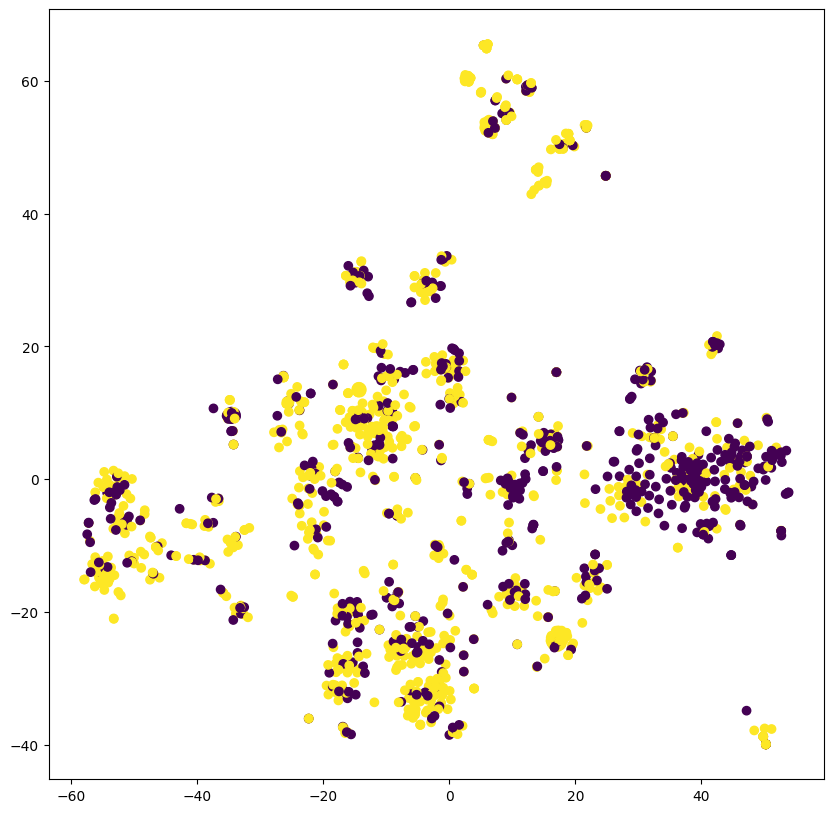

In [21]:
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y)
plt.show()

Получив матрицу признаков и столбец ответ поделим наши данные на валидационную, тренировочную и тестовую часть

# Обучение на необработанных данных

Посмотрим результаты обучения на не очищенном от комментариев, знаков препинания и т.д. кодах

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
len(X_train), len(X_val), len(X_test)

(1093, 365, 163)

Всё готово для того, чтобы воспользоваться методом ближайших соседей, метрикой качества у нас будет точность или сбалансированная точность так как датасет несбалансирован

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

In [25]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(balanced_accuracy_score(y_val, y_pred))

0.6015151515151516


Отлично! Теперь можем попробовать подобрать число соседей

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [27]:
param_grid = {
    'n_neighbors': np.arange(1, 10, 1),
}

search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
search.best_params_

{'n_neighbors': 9}

In [28]:
search.best_score_

0.6356191776060196

In [29]:
y_pred = search.predict(X_val)
print(balanced_accuracy_score(y_val, y_pred))

0.6453030303030303


Получаем результат

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = model.predict(X_val)
print(balanced_accuracy_score(y_val, y_pred))

0.6077272727272727


С параметрами по умолчанию получилось хуже чем у лучшего KNN, попробуем добавить поиск гиперпараметров

In [33]:
param_grid = {
    'max_depth': np.arange(1, 15, 2),
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
y_pred = search.predict(X_val)

print(balanced_accuracy_score(y_val, y_pred))
search.best_params_

0.6082575757575758


{'max_depth': 3}

Добились ещё одного процента качества

Посмотрим насколько велика ошибка на трейне

как насчёт бэггинга ? Рандомфорест

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(balanced_accuracy_score(y_val, y_pred))

0.6021212121212122


подберём гиперпараметры для леса

In [37]:
param_grid = {
    'max_depth': np.arange(1, 15, 2),
}

search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
y_pred = search.predict(X_val)

print(balanced_accuracy_score(y_val, y_pred))
search.best_params_

0.633560606060606


{'max_depth': 9}

Попробуем бустинг, сможет ли он найти результат получше


# Обработка данных

Немножко обработаем код, уберем из него все скобки, знаки \n, \r, знаки препинания

In [38]:
result_df['code'].iloc[0]['SourceCode'][:3000]

'// File: @openzeppelin/contracts/utils/Context.sol\r\n\r\n\r\n// OpenZeppelin Contracts v4.4.1 (utils/Context.sol)\r\n\r\npragma solidity ^0.8.0;\r\n\r\n/**\r\n * @dev Provides information about the current execution context, including the\r\n * sender of the transaction and its data. While these are generally available\r\n * via msg.sender and msg.data, they should not be accessed in such a direct\r\n * manner, since when dealing with meta-transactions the account sending and\r\n * paying for execution may not be the actual sender (as far as an application\r\n * is concerned).\r\n *\r\n * This contract is only required for intermediate, library-like contracts.\r\n */\r\nabstract contract Context {\r\n    function _msgSender() internal view virtual returns (address) {\r\n        return msg.sender;\r\n    }\r\n\r\n    function _msgData() internal view virtual returns (bytes calldata) {\r\n        return msg.data;\r\n    }\r\n}\r\n\r\n// File: @openzeppelin/contracts/access/Ownable.sol\

In [39]:
import re
pattern = re.compile(r'@[a-zA-Z0-9/.]+')
pattern.sub('', str(result_df['code'].iloc[0]))[:3000]

'{\'SourceCode\': \'// File: \\r\\n\\r\\n\\r\\n// OpenZeppelin Contracts v4.4.1 (utils/Context.sol)\\r\\n\\r\\npragma solidity ^0.8.0;\\r\\n\\r\\n/**\\r\\n *  Provides information about the current execution context, including the\\r\\n * sender of the transaction and its data. While these are generally available\\r\\n * via msg.sender and msg.data, they should not be accessed in such a direct\\r\\n * manner, since when dealing with meta-transactions the account sending and\\r\\n * paying for execution may not be the actual sender (as far as an application\\r\\n * is concerned).\\r\\n *\\r\\n * This contract is only required for intermediate, library-like contracts.\\r\\n */\\r\\nabstract contract Context {\\r\\n    function _msgSender() internal view virtual returns (address) {\\r\\n        return msg.sender;\\r\\n    }\\r\\n\\r\\n    function _msgData() internal view virtual returns (bytes calldata) {\\r\\n        return msg.data;\\r\\n    }\\r\\n}\\r\\n\\r\\n// File: \\r\\n\\r\\n\\r

In [40]:
result_df['code'].head()

0    {'SourceCode': '// File: @openzeppelin/contrac...
1    {'SourceCode': '{{
  "language": "Solidity",
...
2    {'SourceCode': '{{
  "language": "Solidity",
...
3    {'SourceCode': '{{
  "language": "Solidity",
...
4    {'SourceCode': '{{
  "language": "Solidity",
...
Name: code, dtype: object

In [41]:
re.DOTALL = False
cleaned_df = result_df.copy()
to_replace = '{}/,.:;*'
cleaned_df.loc[:, ('code')] = cleaned_df.loc[:, ('code')].astype(str).str.replace(r'@[a-zA-Z0-9/.,:\-\'`_ ]+', ' ', regex=True)
cleaned_df.loc[:, ('code')] = cleaned_df.loc[:, ('code')].astype(str).str.replace(r'/[a-zA-Z0-9/.,:\-\'`_ ]+', ' ', regex=True)
cleaned_df.loc[:, ('code')] = cleaned_df.loc[:, ('code')].astype(str).str.replace(r'\*[a-zA-Z0-9/.,:\-\'`_ ]+', ' ', regex=True)

to_replace = ['\\r', '\\n', '\'', '\"', '', '\r', '\n', '{', '}', '/', '*', ';', ':']
for substr in to_replace:
    cleaned_df.loc[:, ('code')] = cleaned_df.loc[:, ('code')].astype(str).str.replace(substr, '')

cleaned_df.loc[:, ('code')] = cleaned_df.loc[:, ('code')].astype(str).str.replace('  ', ' ')
cleaned_df.loc[:, ('code')] = cleaned_df.loc[:, ('code')].astype(str).str.replace(',', ' ')
cleaned_df['code'].head()

0    SourceCode  (utils )pragma solidity ^0.8.0    ...
1    SourceCode  language Solidity  settings   evmV...
2    SourceCode  language Solidity  sources       c...
3    SourceCode  language Solidity  sources       c...
4    SourceCode  language Solidity  sources       c...
Name: code, dtype: object

In [42]:
print(cleaned_df['code'].iloc[0][:500])
result_df['code'].iloc[0]['SourceCode'][:500]

SourceCode  (utils )pragma solidity ^0.8.0     (as far as an application ).   abstract contract Context   function _msgSender() internal view virtual returns (address)     return msg.sender    function _msgData() internal view virtual returns (bytes calldata)     return msg.data   (last updated v4.7.0) (access )pragma solidity ^0.8.0  (an owner) that can be granted exclusive access to    transferOwnership.     abstract contract Ownable is Context   address private _owner  event OwnershipTransfer


'// File: @openzeppelin/contracts/utils/Context.sol\r\n\r\n\r\n// OpenZeppelin Contracts v4.4.1 (utils/Context.sol)\r\n\r\npragma solidity ^0.8.0;\r\n\r\n/**\r\n * @dev Provides information about the current execution context, including the\r\n * sender of the transaction and its data. While these are generally available\r\n * via msg.sender and msg.data, they should not be accessed in such a direct\r\n * manner, since when dealing with meta-transactions the account sending and\r\n * paying for execution may not be the '

In [43]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_df['code'].astype(str)).toarray()
y = cleaned_df['lifeCycle']
y

0       1
1       1
2       1
3       1
4       1
       ..
1630    0
1631    0
1632    0
1633    0
1634    0
Name: lifeCycle, Length: 1621, dtype: int64

In [44]:
len(y[y == 1]), len(y[y == 0]), len(X[y == 1])

(1019, 602, 1019)

Данные несбалансированы, меток класса 1 в два раза больше чем меток класса 2 

# Обучение на сбалансированных данных

## Балансировка данных

In [45]:
def split_balanced_and_validation(X, y):
    eq_len = len(y[y == 0])

    balanced_X = []
    balanced_y = []

    validation_X = []
    validation_y = []
    for i in range(len(X)):
        if y.iloc[i] == 1 and len(balanced_X) < eq_len or y.iloc[i] == 0:
            balanced_X.append(X[i])
            balanced_y.append(y.iloc[i])
        else:
            validation_X.append(X[i])
            validation_y.append(y.iloc[i])

    return np.array(balanced_X), np.array(balanced_y), np.array(validation_X), np.array(validation_y)

In [46]:
balanced_X, balanced_y, validation_X, validation_y = split_balanced_and_validation(X, y)

In [47]:
len(balanced_X), len(balanced_y)

(1091, 1091)

## Визуализация

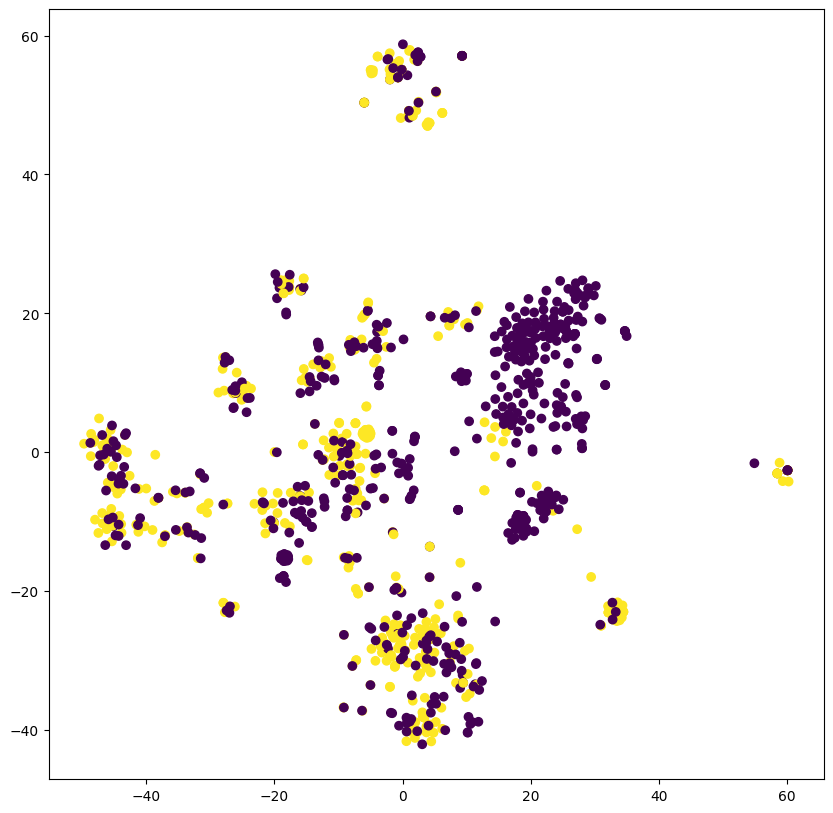

In [48]:
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(balanced_X)
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = balanced_y)
plt.show()

## Обучение

In [49]:
X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
len(X_train), len(X_val), len(X_test)

(735, 246, 110)

In [50]:
param_grid = {
    'n_neighbors': np.arange(1, 20, 1),
}

search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
y_pred = search.predict(X_val)
print(balanced_accuracy_score(y_val, y_pred))
search.best_params_

0.6578947368421053


{'n_neighbors': 15}

In [51]:
y_pred = search.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.713616594178655


In [52]:
param_grid = {
    'max_depth': np.arange(1, 15, 2),
}

search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
y_pred = search.predict(X_val)

print(balanced_accuracy_score(y_val, y_pred))
search.best_params_

0.7537878787878788


{'max_depth': 5}

## Результат на отложенных данных

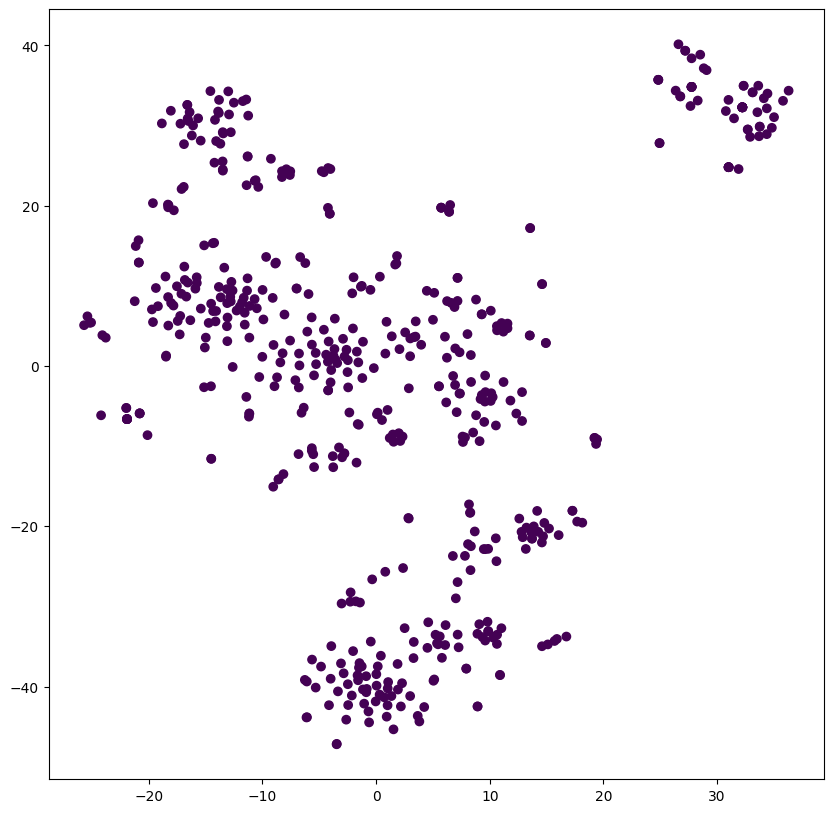

In [53]:
validation_X, validation_y

validation_X_embedded = tsne.fit_transform(validation_X)
plt.figure(figsize=(10, 10))
plt.scatter(validation_X_embedded[:, 0], validation_X_embedded[:, 1], c = validation_y)
plt.show()

In [54]:
y_pred = search.predict(validation_X)
print(balanced_accuracy_score(validation_y, y_pred)) 

0.4962264150943396


/home/maga/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


## Результат на несбалансированных данных

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
len(X_train), len(X_val), len(X_test)

(1093, 365, 163)

In [59]:
param_grid = {
    'max_depth': np.arange(1, 15, 2),
}

search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
y_pred = search.predict(X_val)

print(balanced_accuracy_score(y_val, y_pred))
search.best_params_

0.5785786205739218


{'max_depth': 11}

In [59]:
param_grid = {
    'n_neighbors': np.arange(1, 25, 1),
}

search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='balanced_accuracy')
search.fit(X_train, y_train)
search.best_params_

{'n_neighbors': 20}

In [60]:
y_pred = search.predict(X_val)
print(balanced_accuracy_score(y_val, y_pred))

0.6761807843897396


In [61]:
y_pred = search.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.6931261481935089


# Сохранение лучшей модели и tf-idf

In [62]:
import pickle

In [66]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

In [67]:
with open('../service/best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('../service/best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [71]:
from sklearn.metrics import recall_score, precision_score
y_pred = loaded_model.predict(X_val)
print(recall_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(balanced_accuracy_score(y_val, y_pred))

0.8225108225108225
0.753968253968254
0.6799121276733218


In [65]:
with open('../service/tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('../service/tfidf.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)